# Методы оптимизации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.datasets import make_regression

/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Минимизируем функцию $f(x)=x^2-3x+2$

In [2]:
def f(x):
    return x ** 2 - 3 * x + 2

Производная функции: $f'(x)=2x-3$

$f'(x)=0 $

$x_{min} = \frac{3}{2}$

Проверим численно:

In [3]:
x_start = 10
minimize(f, (x_start,))

      fun: -0.25
 hess_inv: array([[0.49999999]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([1.49999999])

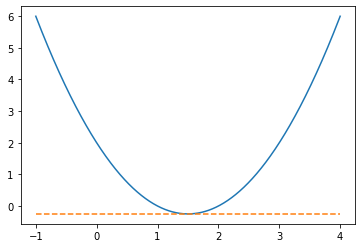

In [4]:
x = np.linspace(-1, 4, 1000)
y = f(x)
minimum = np.ones_like(x) * -0.25

plt.plot(x, y)
plt.plot(x, minimum, '--')

## Задача

Максимизировать функцию $g(x)=-x^5 - 10x^4 + 5x^3 + 10$

P.S. функции `maximize` нет в `scipy`

## Функция нескольких переменных

In [5]:
def f(x, y):
    return x ** 2 + y ** 2

x_start = [10, 10]
minimize(lambda x: f(x[0], x[1]), (x_start,))

      fun: 9.714371423329325e-13
 hess_inv: array([[ 0.75000002, -0.24999998],
       [-0.24999998,  0.75000002]])
      jac: array([-1.37896909e-06, -1.37896909e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-6.96935126e-07, -6.96935127e-07])

## Напишем свою линейную регрессию

На основе SGD

In [6]:
n = 10000
m = 4
bias = 10
x, y, coef = make_regression(n, m - 1, bias=bias, coef=True)
coef = np.hstack(([bias], coef)).reshape(-1, 1)
y = y.reshape(-1, 1)

In [7]:
coef

array([[10.        ],
       [83.39077246],
       [76.01088575],
       [55.23013437]])

Нарисуем данные

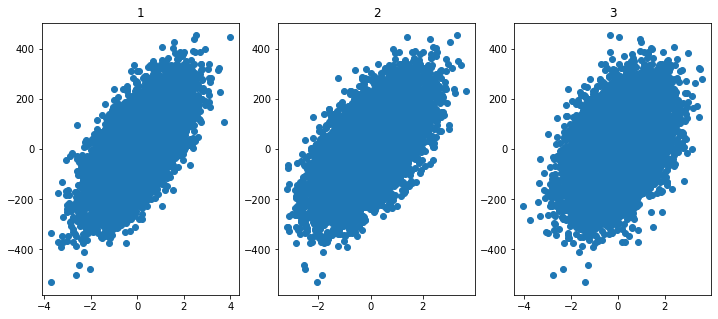

In [8]:
figure, axes = plt.subplots(1, m - 1)
figure.set_figheight(5)
figure.set_figwidth(12)
for i in range(1, m):
    axes[i - 1].scatter(x[:, i - 1], y)
    axes[i - 1].set_title(i)

Проверим веса по готовой линейной регрессии

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
model.coef_, model.intercept_

(array([[83.39077246, 76.01088575, 55.23013437]]), array([10.]))

В качестве нулевой колонки поставим вектор из единиц для удобства

In [10]:
x_ones = np.ones((n, 1))
x = np.hstack((x_ones, x))
x.shape

(10000, 4)

## Задача

Научимся применять модель с любыми весами

In [11]:
def forward(X, w):
    # Ваш код здесь
    pass

In [12]:
w = np.zeros((m, 1))
print(f'Прогноз для нулей\n{forward(x, w)[:5].flatten()}')

w = np.ones((m, 1))
print(f'Прогноз для единиц\n{forward(x, w)[:5].flatten()}')

w = coef.copy()
print(f'Прогноз линейной регрессии\n{forward(x, w)[:5].flatten()}')

Прогноз для нулей
[0. 0. 0. 0. 0.]
Прогноз для единиц
[-0.20938348 -0.0481995   2.52810324  0.57581563  1.39680818]
Прогноз линейной регрессии
[-111.59844179  -41.84762029  108.63023992   11.5923359    50.27462565]


## Задача

Написать лосс-функцию для линейной регрессии

In [13]:
def loss(X, y, w):
    # Ваш код здесь
    pass

In [14]:
w = np.zeros((m, 1))
print(f'Лосс большой {loss(x, y, w):.2f}')

w = np.ones((m, 1))
print(f'Лосс поменбше {loss(x, y, w):.2f}')

w = coef.copy()
print(f'Лосс ваще маленький жесть {loss(x, y, w):.2f}')

Лосс большой 15780.88
Лосс поменбше 15341.02
Лосс ваще маленький жесть 0.00


## Задача

Написать градиент лосс-функции

Есть два варианта, выбираем какой больше нравится:

- Аналитический
- Численный

Формула для аналитического градиента:

$$
\frac{2}{N} X^T(\hat{y} - y)
$$

In [15]:
def grad_loss(X, y, w):
    # Ваш код здесь
    pass

def grad_norm(X, y, w):
    return np.linalg.norm(grad_loss(X, y, w))

In [16]:
w = np.zeros((m, 1))
print(f'Градиент большой {grad_loss(x, y, w)}')

w = np.ones((m, 1))
print(f'Градиент поменбше {grad_loss(x, y, w)}')

w = coef.copy()
print(f'Градиент ваще маленький жесть {grad_loss(x, y, w)}')

Градиент большой [[ -17.33855468]
 [-166.4196125 ]
 [-151.49515046]
 [-108.55019755]]
Градиент поменбше [[ -15.37817811]
 [-164.42906181]
 [-149.52407243]
 [-106.58781229]]
Градиент ваще маленький жесть [[ 9.25481913e-17]
 [-3.05432615e-16]
 [-1.47219102e-16]
 [ 6.25315403e-17]]


In [24]:
w = np.zeros((m, 1))
print(f'Норма градиента большая {grad_norm(x, y, w)}')

w = np.ones((m, 1))
print(f'Норма градиента поменбше {grad_norm(x, y, w)}')

w = coef.copy()
print(f'Норма градиента ваще маленький жесть {grad_norm(x, y, w)}')

Норма градиента большая 250.4596552479365
Норма градиента поменбше 246.9652094774357
Норма градиента ваще маленький жесть 3.5698446427503734e-16


## Задача

На каждом шаге SGD нам нужно будет выбирать случайную строку (или несколько строк) из датасета.

Напишем эту функцию

In [18]:
def random_row(x ,y):
    # Ваш код здесь
    pass

## Задача

Напишем один шаг градиентного спуска. На вход находим оптимальные веса для переданных `x_k` и `y_k`

In [25]:
def sgd_one_step(x_k, y_k, w, n_iter=100):
    # Ваш код здесь
    pass

## Задача

Напишем целый SGD. На каждом шаге цикла будем вызывать `random_row` и оптимизироваться по этим строкам.

In [26]:
def sgd_full(x, y, w_start, n_iters=1000, lr=0.1):
    # Ваш код здесь
    pass

In [21]:
w = np.random.normal(size=(m, 1))
lr = 0.001

In [22]:
w = sgd_full(x, y, w, 1000, lr)
w

array([[10.00398229],
       [83.39177516],
       [76.01225519],
       [55.23008722]])

In [23]:
coef

array([[10.        ],
       [83.39077246],
       [76.01088575],
       [55.23013437]])